In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sklearn

In [2]:
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
    in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [7]:
df_imputed = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/organised_data_mean_imput.csv')

y = df_imputed[['outcome']]
X = df_imputed[['age_of_onset', 'gender', 'country', 'employment', 'type_of_resistance',
       'bmi', 'lung_localization', 'overall_percent_of_abnormal_volume',
       'pleural_effusion_percent_of_hemithorax_involved',
       'ispleuraleffusionbilateral', 'other_non_tb_abnormalities',
       'are_mediastinal_lymphnodes_present', 'collapse', 'smallcavities',
       'mediumcavities', 'largecavities',
       'isanylargecavitybelongtoamultisextantcavity',
       'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity',
       'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules',
       'mediumnodules', 'largenodules', 'hugenodules',
       'isanycalcifiedorpartiallycalcifiednoduleexist',
       'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
       'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
       'mediumdensitystabalizedfibroticnodules',
       'highdensitycalcifiedtypicallysequella', 'period_span', 'regimen_count',
       'Others', 'cytostatics',
       'Systemically administered glucocorticoids', 'Psychiatric illness',
       'Pneumoconiosis', 'Anemia', 'Hepatic diseases', 'Renal disease',
       'Diabetes', 'Post-COVID-19', 'COVID-19', 'HIV',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Ofloxacin', 'Pretomanid',
       'Prothionamide', 'Pyrazinamide', 'Rifampicin', 'Streptomycin',
       'Terizidone', 'p-aminosalicylic acid', 'Amikacin',
       'Aminoglycosides - injectible agents']]

X.drop(columns=['country','Others'], inplace=True)

/tmp/ipykernel_82106/71359335.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['country','Others'], inplace=True)


In [10]:
df_imputed['smallcavities']

0        0.0
1        0.0
2        2.0
3        1.0
4        1.0
        ... 
12120    1.0
12121    0.0
12122    3.0
12123    0.0
12124    1.0
Name: smallcavities, Length: 12125, dtype: float64

In [11]:
columns_to_round = ['smallcavities',
       'mediumcavities', 'largecavities',
       'isanylargecavitybelongtoamultisextantcavity',
       'canmultiplecavitiesbeseen','infiltrate_highdensity', 'smallnodules',
       'mediumnodules', 'largenodules', 'hugenodules',
       'isanycalcifiedorpartiallycalcifiednoduleexist',
       'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
       'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
       'mediumdensitystabalizedfibroticnodules',
       'highdensitycalcifiedtypicallysequella']

# Round values in specified columns
df_imputed[columns_to_round] = df_imputed[columns_to_round].round()

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
scaler = MinMaxScaler()

X[['age_of_onset','bmi', 'overall_percent_of_abnormal_volume',
       'pleural_effusion_percent_of_hemithorax_involved', 'collapse', 'smallcavities',
       'mediumcavities', 'largecavities',
       'isanylargecavitybelongtoamultisextantcavity',
       'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity',
       'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules',
       'mediumnodules', 'largenodules', 'hugenodules',
       'isanycalcifiedorpartiallycalcifiednoduleexist',
       'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
       'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
       'mediumdensitystabalizedfibroticnodules',
       'highdensitycalcifiedtypicallysequella', 'period_span', 'regimen_count'
       ]] = scaler.fit_transform(X[['age_of_onset','bmi', 'overall_percent_of_abnormal_volume',
       'pleural_effusion_percent_of_hemithorax_involved', 'collapse', 'smallcavities',
       'mediumcavities', 'largecavities',
       'isanylargecavitybelongtoamultisextantcavity',
       'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity',
       'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules',
       'mediumnodules', 'largenodules', 'hugenodules',
       'isanycalcifiedorpartiallycalcifiednoduleexist',
       'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists',
       'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules',
       'mediumdensitystabalizedfibroticnodules',
       'highdensitycalcifiedtypicallysequella', 'period_span', 'regimen_count'
       ]])

/tmp/ipykernel_82106/347581684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age_of_onset','bmi', 'overall_percent_of_abnormal_volume',


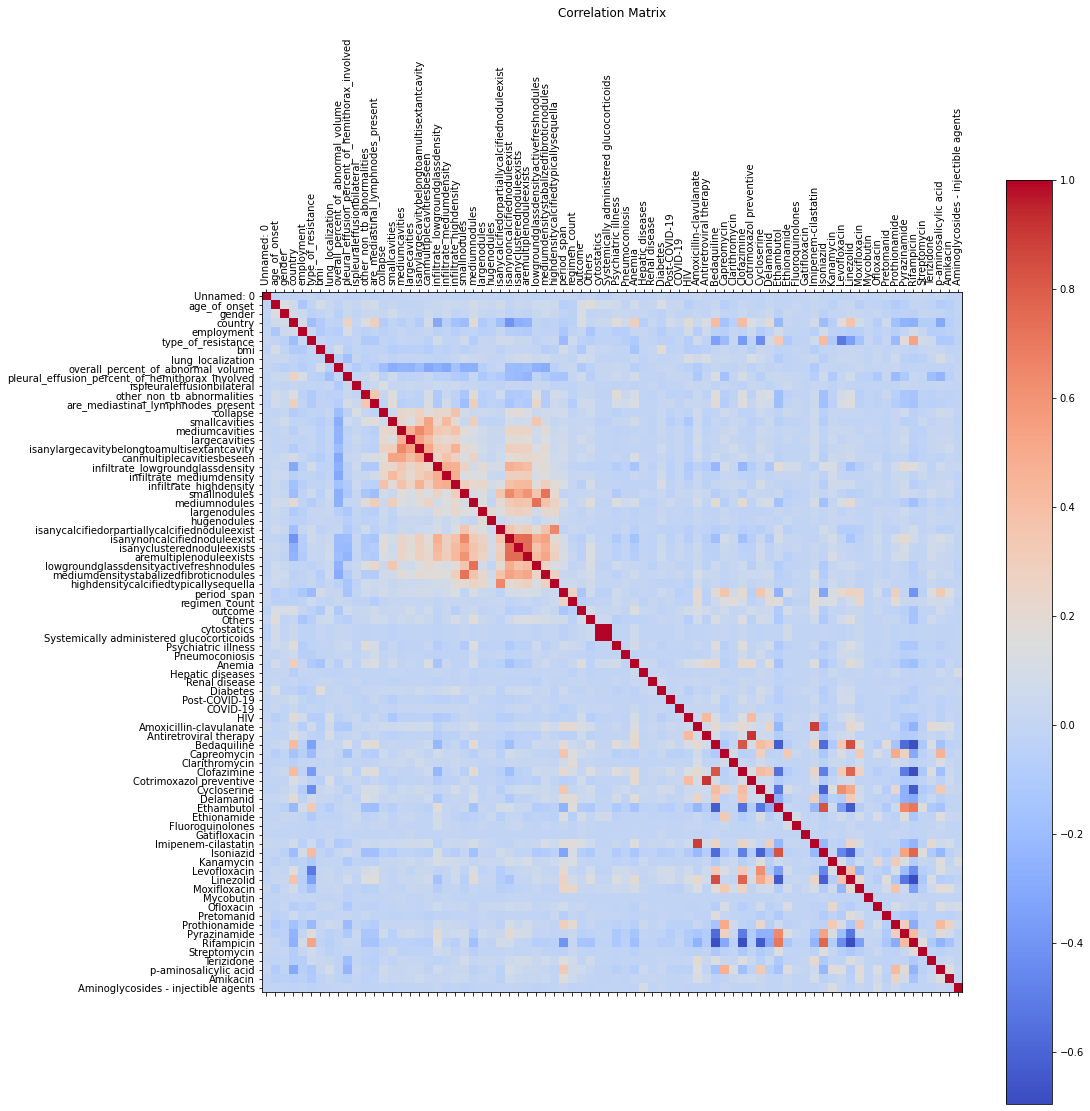

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'merged_data1' is your DataFrame
corr_matrix = df_imputed.corr()

fig, ax = plt.subplots(figsize=(16, 16))  # Set size of the figure

# Create a heatmap
cax = ax.matshow(corr_matrix, cmap='coolwarm')  # 'coolwarm' is a visually pleasing colormap for correlation matrices

# Add colorbar to interpret values
fig.colorbar(cax)

# Set ticks and labels
ticks = np.arange(0, len(corr_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)  # Rotate x-axis labels for better readability
ax.set_yticklabels(corr_matrix.columns)

# Optional: Add a title and adjust layout
plt.title('Correlation Matrix', pad=20)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()